<a href="https://colab.research.google.com/github/yaara-dev/sna/blob/main/SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython


In [2]:
%%R
install.packages(
    "igraph",
    quiet = TRUE
)

In [ ]:
%%R
library(igraph)

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union




In [ ]:
%%R
data <- read.csv(
    "/content/interactionMatrix_frame_0_to_27000_gap_120_interaction_number.txt",
    header=FALSE,
    sep="\t"
)

data[is.na(data) ] <- 0
net_df <- data.frame(
    from_node=c(),
    to_node=c()
)
weighted_net_df <- data.frame(
    from_node=c(),
    to_node=c(),
    num=c()
)
i <- 1
for ( row in data){
  j <- 1
  for (cell in row ){
    if(cell > 0){
      weighted_net_df <- rbind(
        weighted_net_df,
        data.frame(
            from_node=c(i),
            to_node=c(j),
            num=c(cell)
        )
      )
      for ( a in 0:cell) {
          net_df <- rbind(
              net_df,
              data.frame(
                  from_node=c(i),
                  to_node=c(j)
                )
            )
      }
    }
    j <- j + 1
  }
  i <- i + 1
}


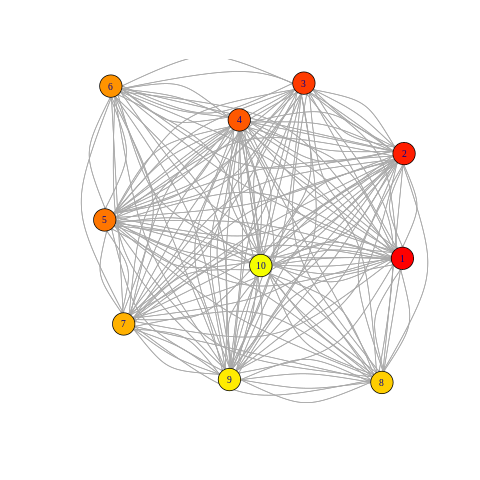

In [ ]:
%%R
net <- graph.data.frame(
    net_df,
    directed=T
)

plot(net,
     vertex.color=rainbow(52),
     vertext.size=2,
     edge.arrow.size=0.1,
     vertex.label.cex=0.8,
     layout=layout.kamada.kawai,
)



In [ ]:
%%R
normalize <- function(x) {
    x / sqrt(
        sum(x^2)
    )
}

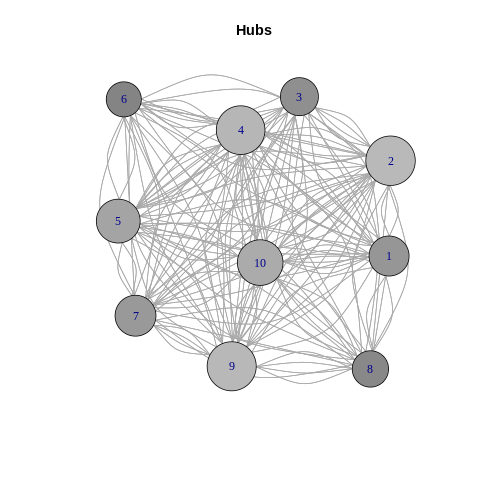

In [ ]:
%%R

degree_centrality <- normalize(hub_score(net)$vector + authority.score(net)$vector)
set.seed(123)
plot(
  net,
  vertex.size=degree_centrality*100,
  main = 'Hubs',
  vertex.color=rgb(
    degree_centrality*2,
    degree_centrality*2,
    degree_centrality*2
  ),
  edge.arrow.size=0,
  layout=layout.kamada.kawai
)




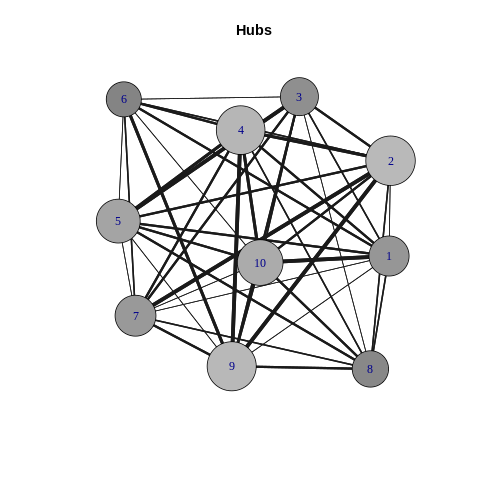

In [ ]:
%%R

degree_centrality <- normalize(hub_score(net)$vector + authority.score(net)$vector)
weighted_net <- graph.data.frame(
    weighted_net_df,
    directed=T
)

set.seed(123)
plot(
  weighted_net,
  vertex.size=degree_centrality*100,
  main = 'Hubs',
  vertex.color=rgb(
    degree_centrality*2,
    degree_centrality*2,
    degree_centrality*2
  ),
  edge.arrow.size=0,
  edge.width= weighted_net_df$num,
  edge.color="gray10",
  layout=layout.kamada.kawai
)



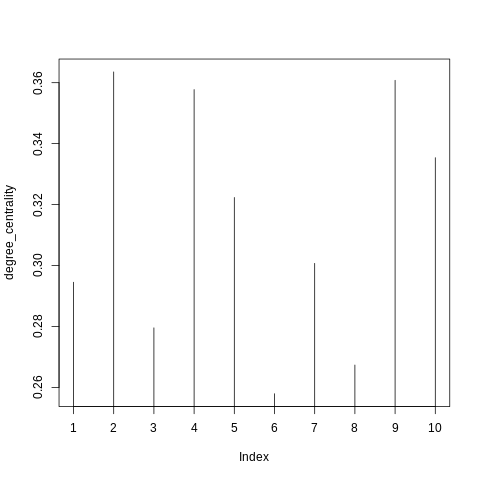

In [ ]:
%%R
plot(
    degree_centrality,
    type='h',
    xaxt="n"
)
axis(
    1,
    at=seq(
        1,
        10,
        by=1
    ),
    las=0
)
